In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#  importing the dataset 

df_train=pd.read_csv('black_friday-train.csv')
df_train.shape


(550068, 12)

In [3]:
df_test=pd.read_csv('black_friday-test.csv')
df_test.shape

(233599, 11)

## Feature Engineering

In [4]:
# merge train and test dataset

df=pd.concat([df_train,df_test])
print(df.shape)
df.head(3)

(783667, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [5]:
df.drop(['User_ID'],axis=1,inplace=True)
df.dropna()
print(df.shape)

(783667, 11)


In [6]:
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [7]:
cats= [col for col in df_train.columns if col not in ['User_ID','Purchase','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']]
for cat in cats:
    print("Unique value in ",cat," columns",df_train[cat].unique(),'\n')

Unique value in  Gender  columns ['F' 'M'] 

Unique value in  Age  columns ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Unique value in  Occupation  columns [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

Unique value in  City_Category  columns ['A' 'C' 'B'] 

Unique value in  Stay_In_Current_City_Years  columns ['2' '4+' '3' '1' '0'] 

Unique value in  Marital_Status  columns [0 1] 



In [8]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df.drop('City_Category',axis=1,inplace=True)

In [10]:
df=pd.concat([df,df_city],axis=1)

In [11]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [12]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])

    return "Checked Duplicates"
# Remove Duplicates from "df" data :
remove_duplicate(df)

BEFORE REMOVING DUPLICATES - No. of Rows =  783667
AFTER REMOVING DUPLICATES  - No. of Rows =  767700


'Checked Duplicates'

In [13]:
# seaching the missing values


df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            242509
Product_Category_3            536383
Purchase                      217745
B                                  0
C                                  0
dtype: int64

In [14]:
#replace missing values


df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

# We are droping category 3 becaose it has too many null value
df.drop('Product_Category_3',axis=1,inplace=True)

In [15]:
df['Product_Category_2'].isnull().sum()

0

In [16]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

# string replacment in column

In [18]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [19]:
# Stay_In_Current_City_Years is in object format so we need to convert into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

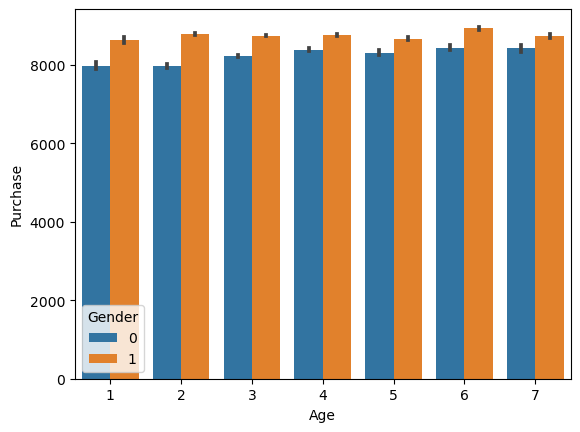

In [20]:
#VISUALISATION

sns.barplot('Age','Purchase',hue='Gender', data=df)

##### PURCHASING OF MEN IS HIGHER THAN WOMEN IN ALL AGE GROUP 

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

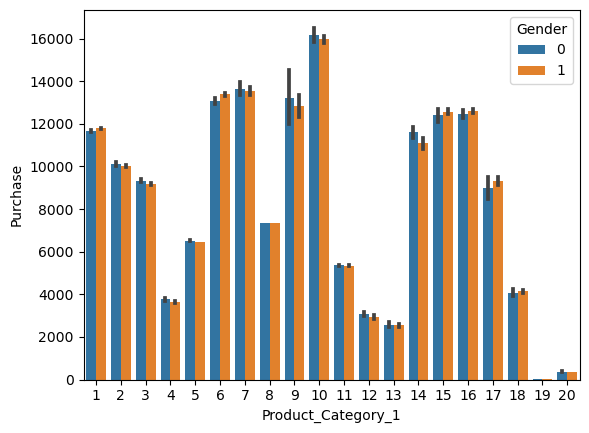

In [21]:

sns.barplot('Product_Category_1','Purchase',hue='Gender', data=df)

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

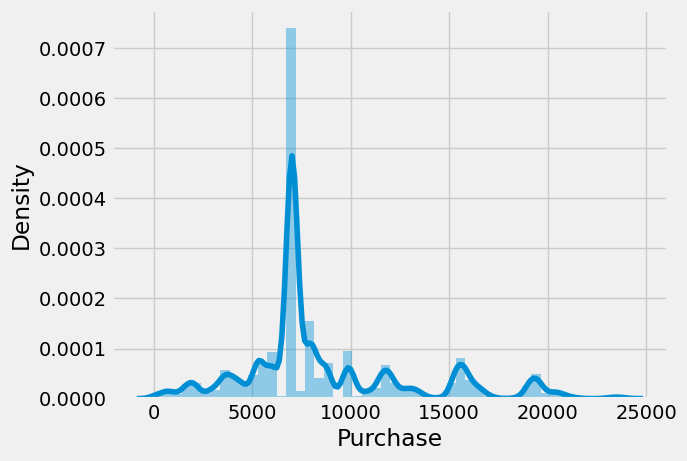

In [22]:
#Distplot of purchase

plt.style.use("fivethirtyeight")
sns.distplot(df['Purchase'])

In [23]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'B', 'C'],
      dtype='object')

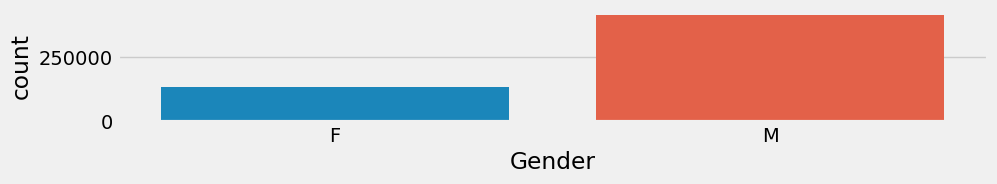

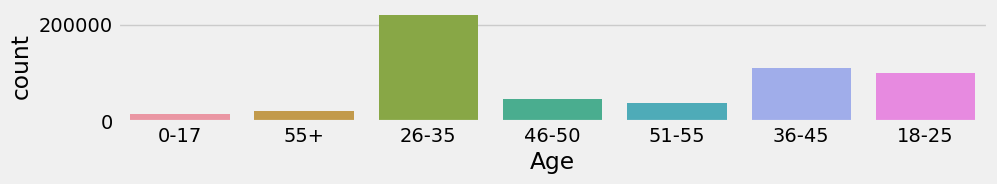

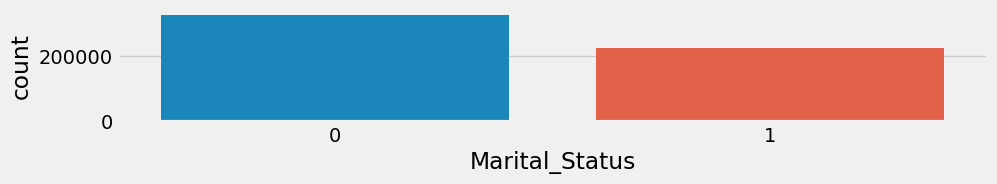

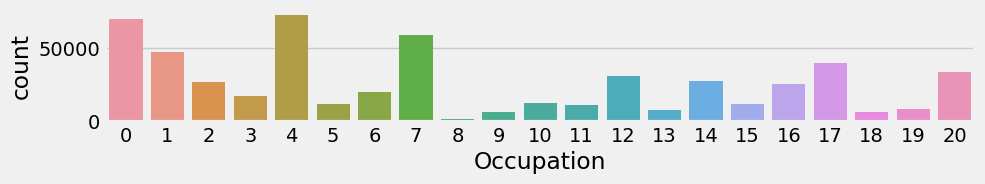

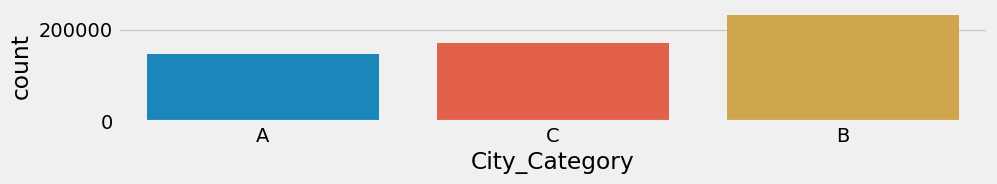

In [24]:
countplot=['Gender','Age','Marital_Status','Occupation','City_Category']
for i,col in enumerate(countplot):
    plt.figure(figsize=(10,8))
    plt.subplot(5,1,i+1)
    sns.countplot(df_train[col])
       

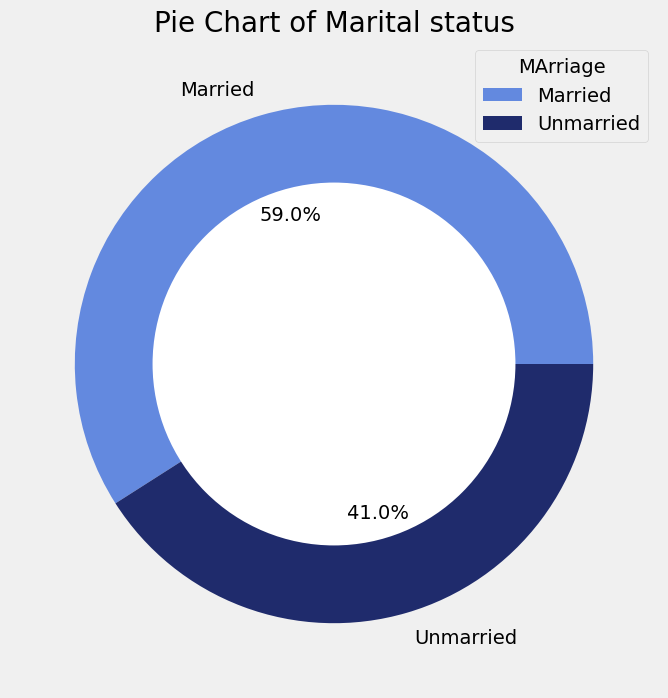

In [25]:
#plotting a pie chart
size = [324731,225337]
label=["Married","Unmarried"]
color=['#6389df','#1f2b6c']
explode = [0, 0]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color,explode=explode,shadow=False,autopct="%.1f%%")

center_circle=plt.Circle((0,0),.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
                     
plt.title("Pie Chart of Marital status", fontsize = 20)
plt.axis('off')
plt.legend(title='MArriage')
plt.show()


## Model Prediction

In [26]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(df.drop(columns=['Product_ID','Purchase']))
y=df['Purchase']

In [40]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    model.fit(x_train, y_train)
    
    # predict the results
                                                
    pred = model.predict(x_test)
    
    # cross validation
    
    cv_score = cross_val_score(model, X, y, scoring= 'neg_mean_squared_error', cv=3)
    cv_score =np.abs(np.mean(cv_score))
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))    
    print("CV Score:", np.sqrt(cv_score))


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
train(dt_model,X,y)

Results
MSE: 3524.603949752076
CV Score: 4108.416187276489


In [42]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 1.1 MB/s eta 0:00:00


In [43]:
from xgboost import XGBClassifier
xg=XGBClassifier()
train(xg,X,y)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [    0     1     2 ... 17646 17647 17648], got [1.2000e+01 1.3000e+01 1.4000e+01 ... 2.3959e+04 2.3960e+04 2.3961e+04]

In [44]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594     7011.0
233595     7011.0
233596     7011.0
233597     7011.0
233598     7011.0
Name: Purchase, Length: 767700, dtype: float64